# Анализ рынка недвижимости - продажа квартир в Санкт-Петербурге

**Задача проекта:**

- выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

**Данные:**
- данные сервиса Яндекс Недвижимость (архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах)

**Описание данных:**

**`airports_nearest`** — расстояние до ближайшего аэропорта в метрах (м)

**`balcony`** — число балконов

**`ceiling_height`** — высота потолков (м)

**`cityCenters_nearest`** — расстояние до центра города (м)

**`days_exposition`** — сколько дней было размещено объявление (от публикации до снятия)

**`first_day_exposition`** — дата публикации

**`floor`** — этаж

**`floors_total`** — всего этажей в доме

**`is_apartment`** — апартаменты (булев тип)

**`kitchen_area`** — площадь кухни в квадратных метрах (м²)

**`last_price`** — цена на момент снятия с публикации

**`living_area`** — жилая площадь в квадратных метрах (м²)

**`locality_name`** — название населённого пункта

**`open_plan`** — свободная планировка (булев тип)

**`parks_around3000`** — число парков в радиусе 3 км

**`parks_nearest`** — расстояние до ближайшего парка (м)

**`ponds_around3000`** — число водоёмов в радиусе 3 км

**`ponds_nearest`** — расстояние до ближайшего водоёма (м)

**`rooms`** — число комнат

**`studio`** — квартира-студия (булев тип)

**`total_area`** — общая площадь квартиры в квадратных метрах (м²)

**`total_images`** — число фотографий квартиры в объявлении

## 1 Открытие файла с данными и изучение общей информации


### 1.1 Обзор данных

In [1]:
# импорт библиотек для выполнения проекта

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Открытие файла с данными. Загрузка данных из файла в датафрейм  (первая строка)

data = pd.read_csv("C:/real_estate_data.csv", sep = '\t')
data.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN


In [3]:
# изучение общей информации о полученном датафрейме

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


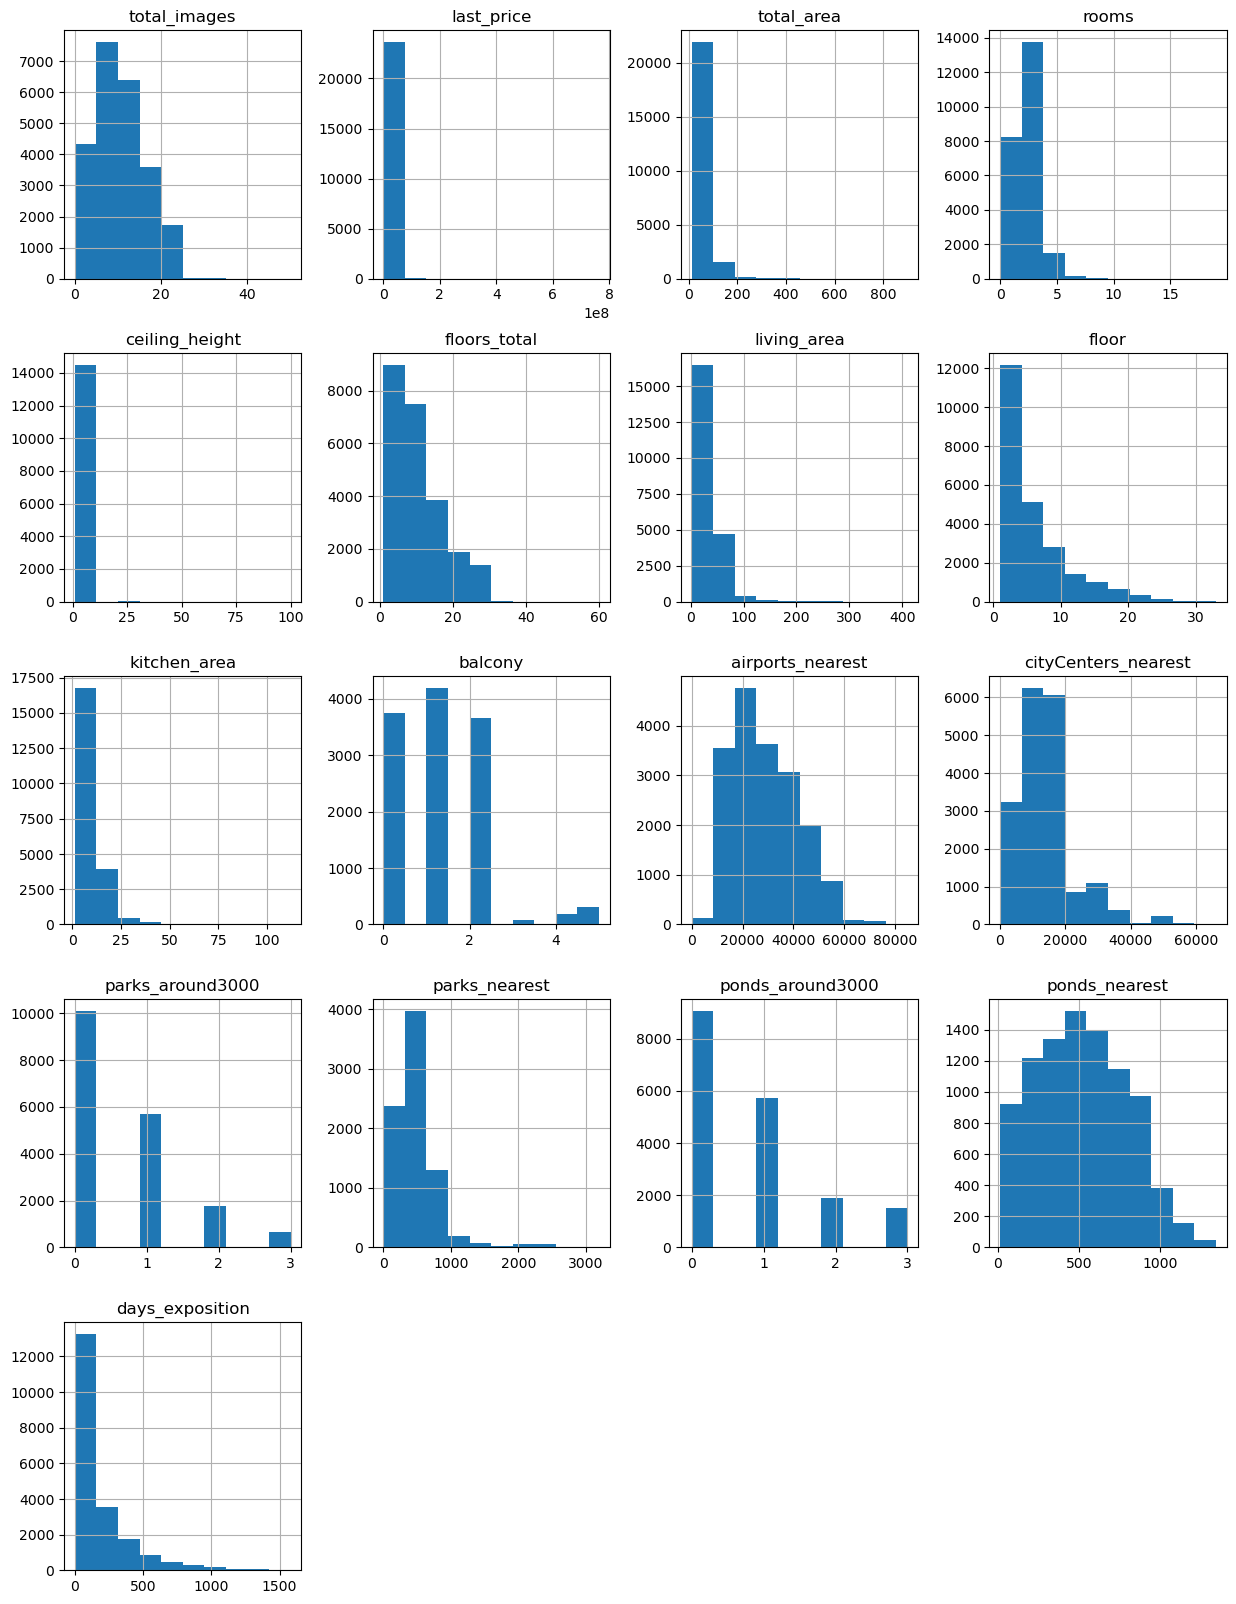

In [4]:
# построений общей гистограммы для всех столбцов таблицы

data.hist(figsize=(15, 20));

### 2. Проводим предобработку данных

In [5]:
# определение, в каких столбцах есть пропуски

data.isna().sum().sort_values(ascending = False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

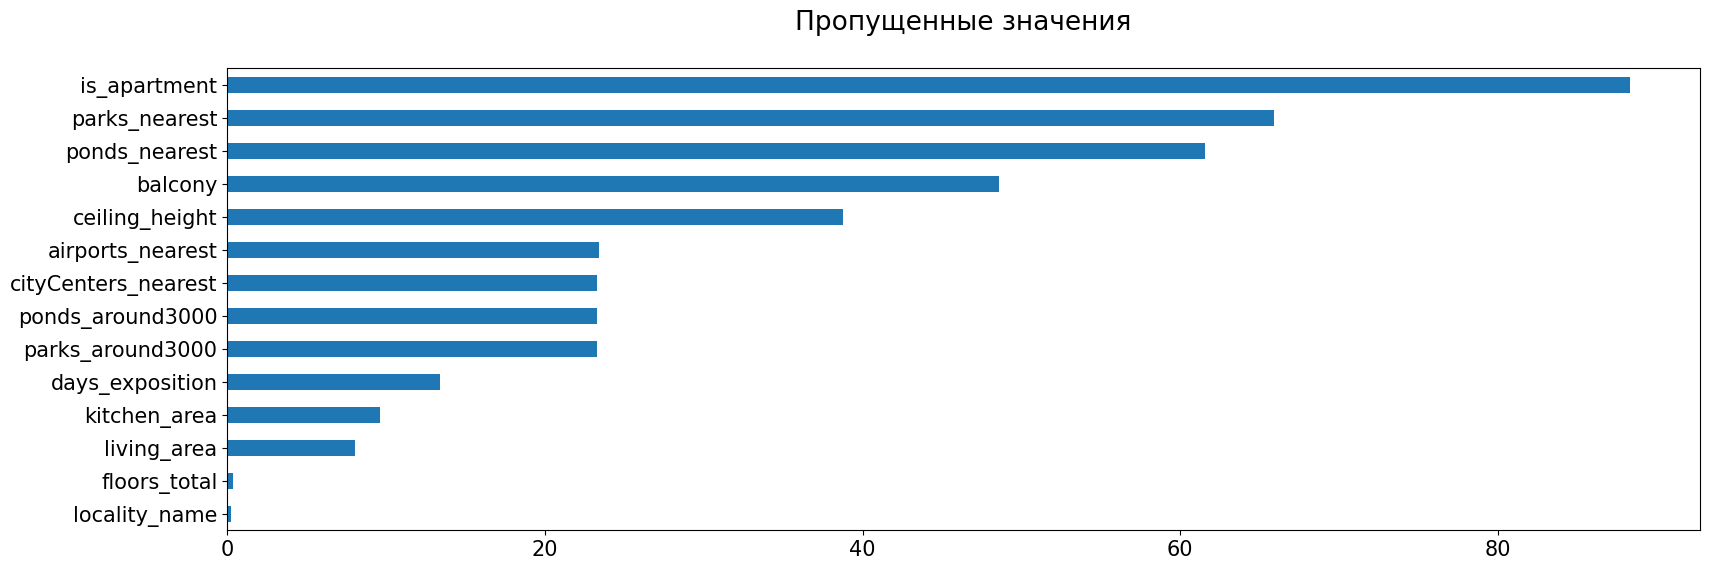

In [6]:
# пропущенные значения на гистограмме

def pass_value_barh(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), rot = 0, legend = False, fontsize = 15)
        .set_title('Пропущенные значения' + "\n", fontsize = 19)    
    );
pass_value_barh(data)

**Столбцы, в которых есть пропуски:**

- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ceiling_height — высота потолков (м)
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- living_area — жилая площадь в квадратных метрах (м²)

### 2.1. Заполнение пропущенных значений

In [7]:
# заполнение пропущенных значений в столбце "balcony" (NaN на 0)
data['balcony'] = data['balcony'].fillna(0) 
#заполнение пропущенных значений в столбце "ponds_around3000" (NaN на 0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
#заполнение пропущенных значений в столбце "parks_around3000" (NaN на 0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
#заполнение пропущенных значений в столбце "is_apartment" (NaN на False)
data['is_apartment'] = data['is_apartment'].fillna(False)

**Возможные причины пропусков:**
- количество балконов могли не заполнить, т.к. квартире просто нет балконов
- количество прудов и парков в пределах 3 км могли не заполнить, т.к. их просто в таких пределах может не быть
- столбец "Это апортаменты" могли не заполнить, т.к. это не апортаменты

**Особенность**
- люди могут не заполнять данные, т.к. подразумевает свой пропуск как нет

### 2.2. Удаление пропущенных значений

In [8]:
# название населенного пункта - удаление строк с пропущенными значений в столбце "locality_name", 
# т.к. доля пропущенных значений менее 1% от всех значений

data = data.dropna(subset = ['locality_name'])

**Возможные причины пропусков:**
- забыли указать название населенного пункта

### 2.3. Обработка пропущенных значений

Обработка данных (floors_total): 
- С учетом того факта, что доля пропущенных данных в совокупности не существенна (0.3%) проведем замену пустых данных на сооветсвующие данные из столбца "floor" (как минимально возможная высота здания)
- После заполнения пустых данных мы можем заменить формат данных в столбце на целочисленный (int64)
- Кроме того проведем проверку на очевидные ошибки, сравнив данные количества этажей всего со значением этажа продаваемой недвижимости

In [9]:
# обработка floors_total (всего этажей в доме)
# функция - доля пропущенных данных в столбце датасета

def impact (dataset,column):
    result = 1 - (len(dataset) - column.isnull().sum()) / len(dataset)
    return result
display("{:.2%}".format(impact(data,data['floors_total']))) # проверяем долю пропущенных данных в столбце

'0.36%'

In [10]:
#замена пустых данных на сооветсвующие данные из столбца "floor"

data['floors_total'] = data['floors_total'].fillna(data['floor'])

In [11]:
#замена формата данных в столбце на целочисленный

data['floors_total'] = data['floors_total'].astype('int64')
data['floors_total'].unique() #проверка уникальных значений

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15,  1, 20, 28, 36, 21, 35, 34, 60, 29, 33,
       52, 37], dtype=int64)

### 2.4. Обработка дубликатов

In [12]:
#производим замену неявных дупликатов

data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('деревня', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок станции', 'поселок при железнодорожной станции')

### 2.5. Изменение типа данных

In [13]:
# изменение типа данных солбца 'first_day_exposition'
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y.%m.%dT%H:%M:%S')

# измененим тип данных столбца "is_apartment"
data['is_apartment'] = data['is_apartment'].astype('bool')

# измененим тип данных столбца "ponds_around3000"
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

# измененим тип данных столбца "parks_around3000"
data['parks_around3000'] = data['parks_around3000'].astype('int')

# измененим тип данных столбца "floors_total"
data['floors_total'] = data['floors_total'].astype('int')

# измененим тип данных столбца "floors_total"
data['balcony'] = data['balcony'].astype('int')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23650 non-null  int32         
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

### 2.6. Устранение редких и выбивающихся значений

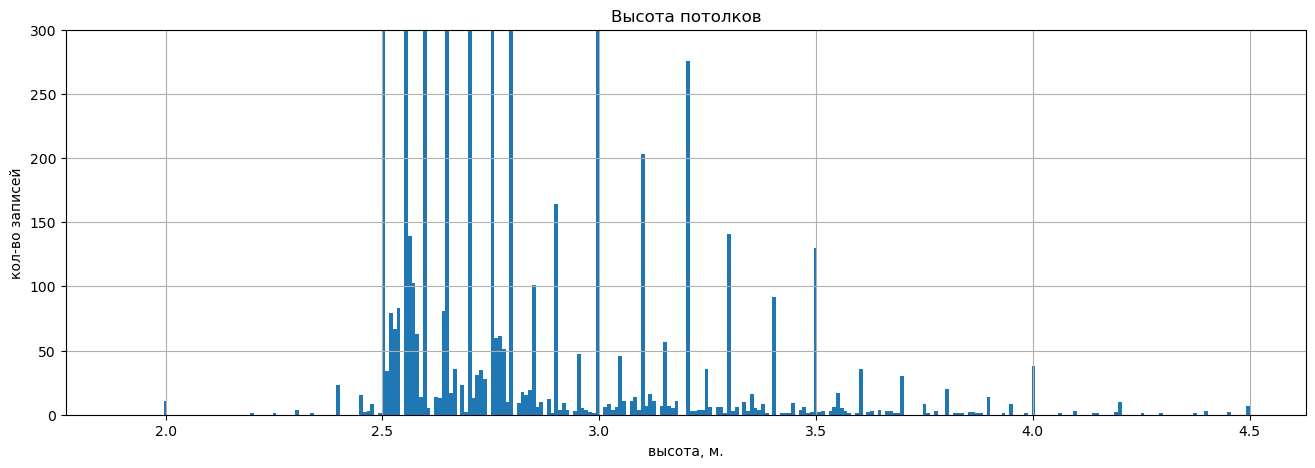

In [14]:
# гистограмма высоты потолк
(
    data['ceiling_height']
        .sort_values()
        .plot(y='ceiling_height', kind='hist', 
              bins=300, range=(1.9,4.5), grid=True, title='Высота потолков', figsize=(16,5))
        .set(ylim = (0, 300), ylabel = 'кол-во записей', xlabel = 'высота, м.')
        
)
plt.show()

(23521, 22)

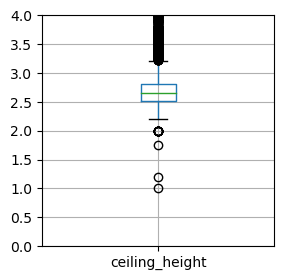

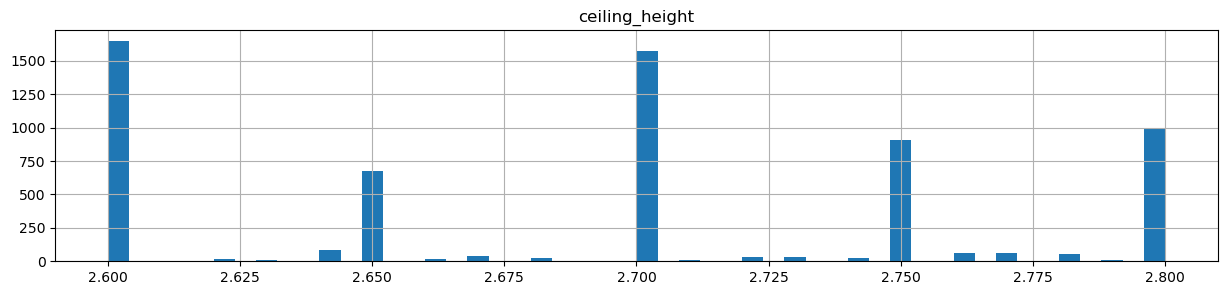

In [15]:
# нахождение аномальных и редких значений посредством графиков

data.boxplot('ceiling_height',figsize = (3,3))
plt.ylim(0,4)
data.hist('ceiling_height', bins = 50, range = (2.6,2.8), figsize = (15,3))

# исправление аномально высоких значений на корректные

data.loc[data['ceiling_height'] > 15,'ceiling_height'] = data.loc[data['ceiling_height'] > 15,'ceiling_height']/10
data = data.query('(2.5 <= ceiling_height <= 4) or (ceiling_height.isna())')
data['ceiling_height'].describe()
data.shape

**Особенность**
- если указана высота потолков больше 20 метров - скорее всего забыли поставили разделить между цифрами, и высота на самом деле меньше в 10 раз.

`Общая площадь квартиры`

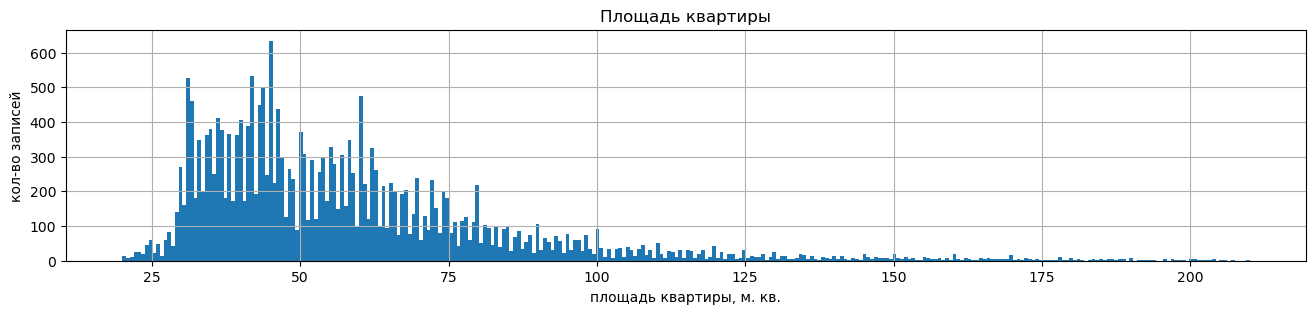

In [16]:
# гистограмма площади квартиры

(
    data['total_area']
        .sort_values()
        .plot(y='total_area', kind='hist', 
              bins=300, range=(20,210), grid=True, title='Площадь квартиры', figsize=(16,3))        
        .set( ylabel = 'кол-во записей', xlabel = 'площадь квартиры, м. кв.')
)
plt.show()

count    23521.000000
mean        60.191897
std         35.076545
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64
23279


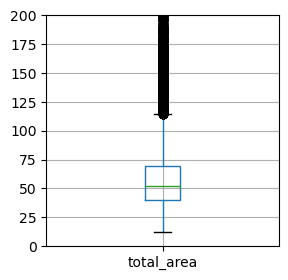

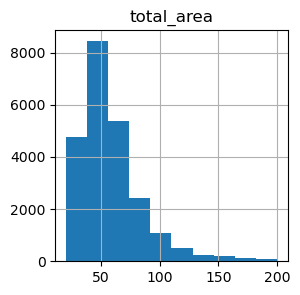

In [17]:
# нахождение аномальных и редких значений посредством графиков

data.boxplot('total_area',figsize = (3,3))
plt.ylim(0,200)
print(data['total_area'].describe())

# удаление строк с редкими значениями

data = data.query('(20 <= total_area <= 200) or (total_area.isna())')
print(data['total_area'].count())
data.hist('total_area',bins = 10,range=(20,200),figsize = (3,3));

`Жилая площадь в квадратных метрах (м²)`

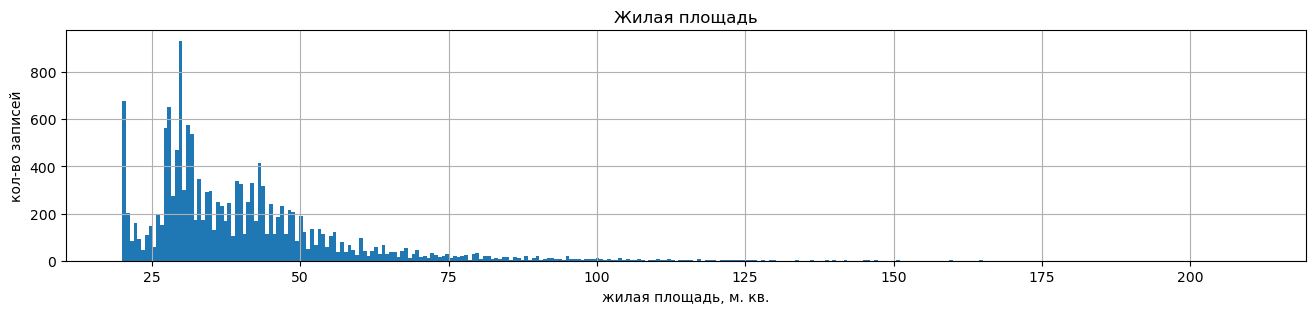

In [18]:
# гистограмма жилой площади (в кв.м)
(
    data['living_area']
        .sort_values()
        .plot(y='living_area', kind='hist', 
              bins=300, range=(20,210), grid=True, title='Жилая площадь', figsize=(16,3))        
        .set( ylabel = 'кол-во записей', xlabel = 'жилая площадь, м. кв.')
)
plt.show();

count    21428.000000
mean        33.239507
std         17.338906
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64


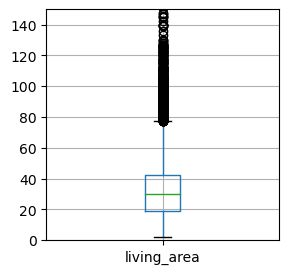

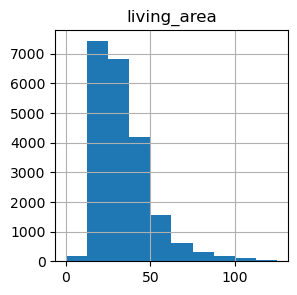

In [19]:
# нахождение аномальных и редких значений посредством графиков
data.boxplot('living_area',figsize = (3,3))
plt.ylim(0,150)
print(data['living_area'].describe())

# удаление строк с редкими значениями
data = data.query('(living_area <= 120) or (living_area.isna())')

data['living_area'].count()
data.hist('living_area',bins = 10,range=(0,125),figsize = (3,3));

`Площадь кухни в квадратных метрах (м²)`

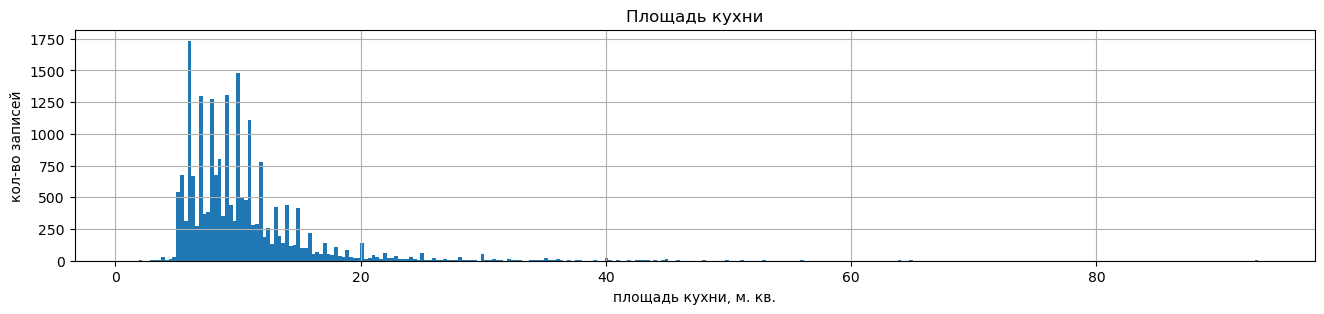

In [20]:
# гистограмма площади кухни (в кв.м)
(
    data['kitchen_area']
        .sort_values()
        .plot(y='kitchen_area', kind='hist', 
              bins=300, grid=True, title='Площадь кухни', figsize=(16,3))        
        .set( ylabel = 'кол-во записей', xlabel = 'площадь кухни, м. кв.')
)
plt.show();

count    21029.000000
mean        10.368308
std          5.351276
min          1.300000
25%          7.000000
50%          9.000000
75%         11.900000
max         93.200000
Name: kitchen_area, dtype: float64


20776

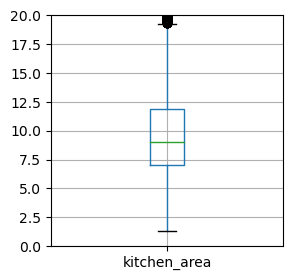

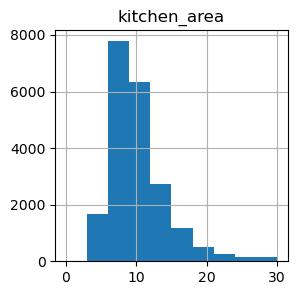

In [21]:
# нахождение аномальных и редких значений посредством графиков
data.boxplot('kitchen_area',figsize = (3,3))
plt.ylim(0,20)
data.hist('kitchen_area',bins = 10,range=(0,30),figsize = (3,3))
print(data['kitchen_area'].describe())

# удаление строк с редкими значениями
data = data.query('(kitchen_area <= 30) or (kitchen_area.isna())')

data['kitchen_area'].count()

`Количество комнат`

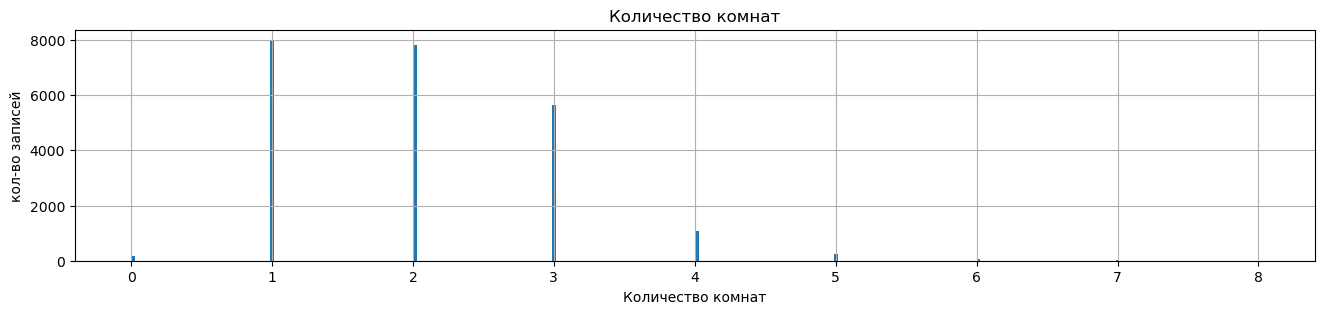

In [22]:
# гистограмма количества комнат
(
    data['rooms']
        .sort_values()
        .plot(y='rooms', kind='hist', 
              bins=300, grid=True, title='Количество комнат', figsize=(16,3))        
        .set( ylabel = 'кол-во записей', xlabel = 'Количество комнат')
)
plt.show();

count    22977.000000
mean         2.018192
std          0.977426
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64
22729


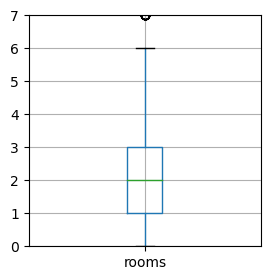

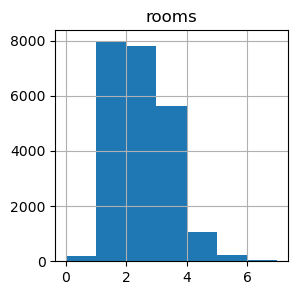

In [23]:
# нахождение аномальных и редких значений посредством графиков
data.boxplot('rooms',figsize = (3,3))
plt.ylim(0,7)
data.hist('rooms',bins = 7,range=(0,7),figsize = (3,3))
print(data['rooms'].describe())

# удаление строк с редкими значениями
data = data.query('(1 <= rooms <= 5) or (rooms.isna())')

print(data['rooms'].count())

`Количество этажей`

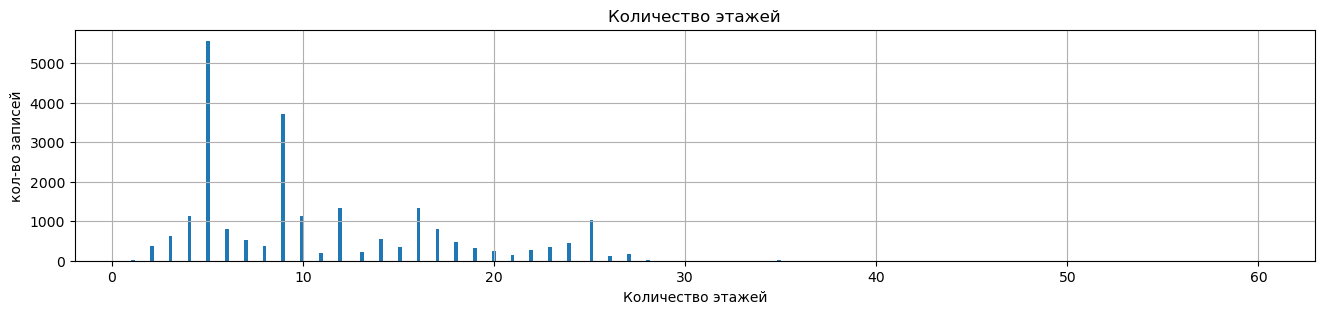

In [24]:
# гистограмма количества этажей
(
    data['floors_total']
        .sort_values()
        .plot(y='floors_total', kind='hist', 
              bins=300, grid=True, title='Количество этажей', figsize=(16,3))        
        .set( ylabel = 'кол-во записей', xlabel = 'Количество этажей')
)
plt.show();

count    22729.000000
mean        10.708170
std          6.585871
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64
22396


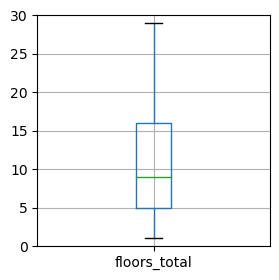

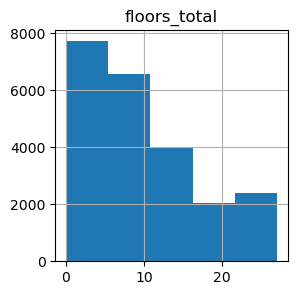

In [25]:
# нахождение аномальных и редких значений посредством графиков
data.boxplot('floors_total',figsize = (3,3))
plt.ylim(0,30)
data.hist('floors_total',bins = 5,range=(0,27),figsize = (3,3))
print(data['floors_total'].describe())

# удаление строк с редкими значениями
data = data.query('(1 <= floors_total <= 25) or (floors_total.isna())')

print(data['floors_total'].count())

`Этаж`

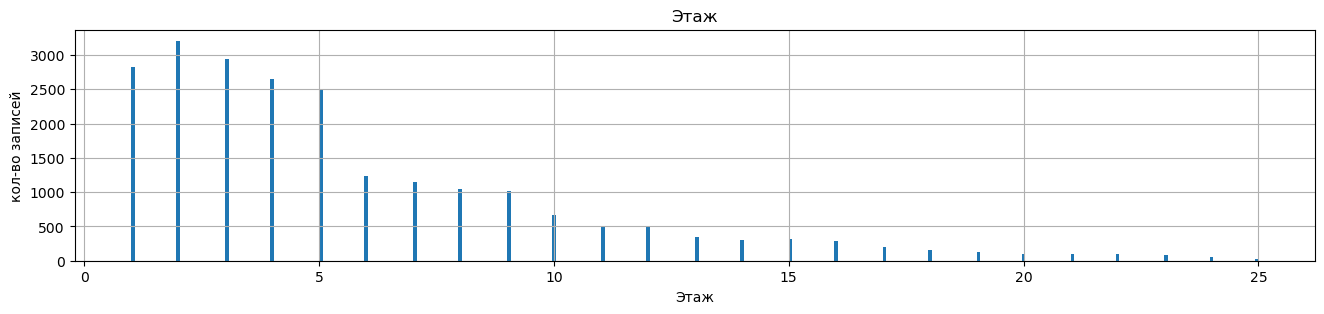

In [26]:
# гистограмма этажей
(
    data['floor']
        .sort_values()
        .plot(y='floor', kind='hist', 
              bins=300, grid=True, title='Этаж', figsize=(16,3))        
        .set(ylabel = 'кол-во записей', xlabel = 'Этаж')
)
plt.show();

count    22396.000000
mean         5.750179
std          4.679299
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         25.000000
Name: floor, dtype: float64


21661

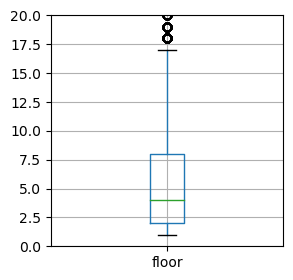

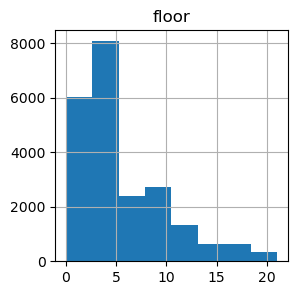

In [27]:
# нахождение аномальных и редких значений посредством графиков
data.boxplot('floor',figsize = (3,3))
plt.ylim(0,20)
data.hist('floor',bins = 8,range=(0,21),figsize = (3,3))
print(data['floor'].describe())

# удаление строк с редкими значениями
data = data[(data['floor'] >= 1)&(data['floor'] <= 17)]

#data = data.query('(1 <= floors_total <= 25) or (floors_total.isna())')

data['floor'].count()

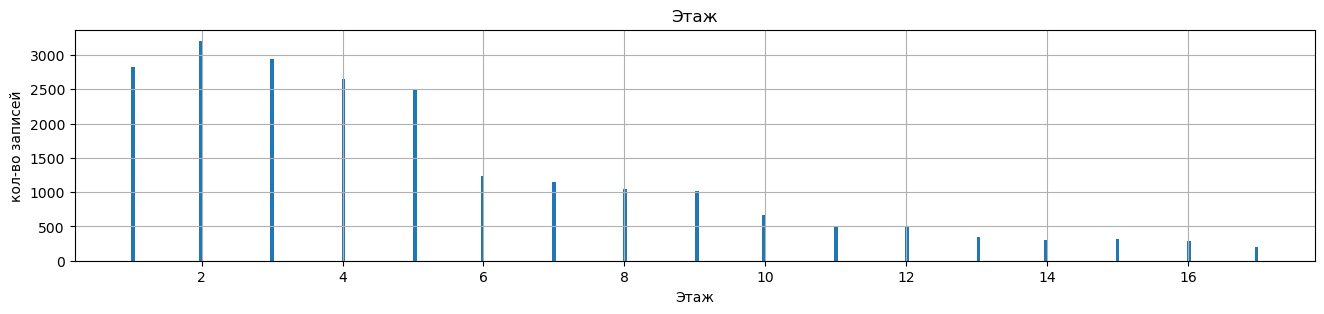

In [28]:
(
    data['floor']
        .sort_values()
        .plot(y='floor', kind='hist', 
              bins=300, grid=True, title='Этаж', figsize=(16,3))        
        .set(ylabel = 'кол-во записей', xlabel = 'Этаж')
)
plt.show();

`Цена на момент снятия с публикации`

In [29]:
# округлим цену квартиры до млн 
data['last_price'] = data['last_price']/1000000
display(data['last_price'].head(5))

0    13.000
1     3.350
2     5.196
3    64.900
5     2.890
Name: last_price, dtype: float64

count    21661.000000
mean         5.776215
std          4.975676
min          0.430000
25%          3.400000
50%          4.590000
75%          6.500000
max        124.000000
Name: last_price, dtype: float64
21291


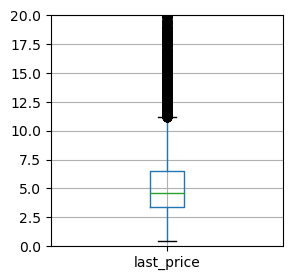

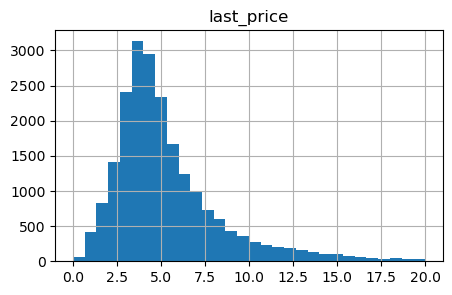

In [30]:
# нахождение аномальных и редких значений посредством графиков
data.boxplot('last_price',figsize = (3,3))
plt.ylim(0,20)
print(data['last_price'].describe())

# удаление строк с редкими значениями
data = data.query('(last_price <= 20) or (last_price.isna())')

print(data['last_price'].count())

data.hist('last_price',bins = 30,range=(0,20),figsize = (5,3));

In [31]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных, средних, медианных и максимальных показателях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor',
       'floors_total']]
    .apply (['count', 'min', 'mean', 'median', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,291.00","21,291.00","13,097.00","18,512.00","21,291.00","19,626.00","19,445.00","21,291.00","21,291.00"
min,1.00,20.00,2.50,1.00,0.43,2.00,1.30,1.00,1.00
mean,2.02,56.05,2.70,177.58,5.32,32.33,9.76,5.24,10.04
median,2.00,51.00,2.60,94.00,4.50,30.00,9.00,4.00,9.00
max,5.00,200.00,4.00,"1,580.00",20.00,120.00,30.00,17.00,25.00


In [32]:
data.shape

(21291, 22)

### 2.1.6. Расчет и добавление в таблицу новых столбцов

In [33]:
data['price_for_m2'] = data['last_price']/data['total_area'] # цена одного квадратного метра
data['weekday'] = data['first_day_exposition'].dt.weekday # день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['month'] = data['first_day_exposition'].dt.month # месяц публикации объявления
data['year'] = data['first_day_exposition'].dt.year # год публикации объявления

# тип этажа квартиры (значения — «первый», «последний», «другой»)
def floor_type (row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    elif row['floor'] <= 0:
        return 'ошибка'
    else:
        return 'другой'
    
data['floor_type'] = data.apply(floor_type, axis = 1)

# расстояние до центра города в километрах
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000 #переводим м в км
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest_km']) #округляем

print(data['cityCenters_nearest_km'].head())

0    16.0
1    19.0
2    14.0
5     NaN
9    15.0
Name: cityCenters_nearest_km, dtype: float64


## 3. Проводим исследовательский анализ данных

**`Площадь квартиры`**

count    21291.000000
mean        56.054980
std         22.208383
min         20.000000
25%         40.000000
50%         51.000000
75%         66.800000
max        200.000000
Name: total_area, dtype: float64


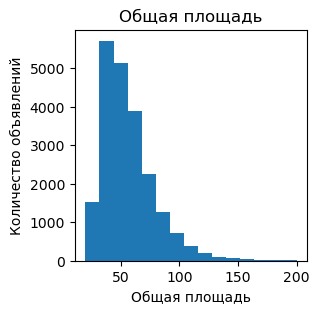

In [34]:
print(data['total_area'].describe())
data['total_area'].plot(bins = 15, kind ='hist',title = 'Общая площадь',figsize = (3,3))\
.set(xlabel = 'Общая площадь',ylabel = 'Количество объявлений');

**Вывод:**
- большая часть предложений - это квартиры площадью до 67 кв.метров.  

**`Жилая площадь`**

count    19626.000000
mean        32.332158
std         15.224174
min          2.000000
25%         18.700000
50%         30.000000
75%         41.400000
max        120.000000
Name: living_area, dtype: float64


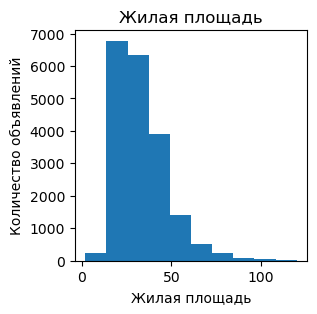

In [35]:
print(data['living_area'].describe())
data['living_area'].plot(bins = 10, kind ='hist',title = 'Жилая площадь',figsize = (3,3))\
.set(xlabel = 'Жилая площадь',ylabel = 'Количество объявлений');

**Вывод:**
- большая часть предложений - это квартиры c жилой площадью до 41 кв.метров, что составляет примерно 63% от общей площади квартиры

**`Площадь кухни`**

count    19445.000000
mean         9.762154
std          3.893767
min          1.300000
25%          7.000000
50%          9.000000
75%         11.200000
max         30.000000
Name: kitchen_area, dtype: float64


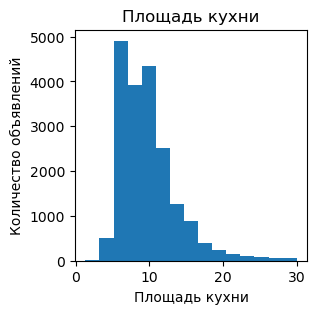

In [36]:
print(data['kitchen_area'].describe())
data['kitchen_area'].plot(bins = 15, kind ='hist',title = 'Площадь кухни',figsize = (3,3))\
.set(xlabel = 'Площадь кухни',ylabel = 'Количество объявлений');

**Вывод:**
- большая часть предложений - это квартиры c кухней площадью до 11 кв.метров, что составляет примерно от 17% от общей площади квартиры

**`Цена объекта`**

count    21291.000000
mean         5.317722
std          3.066912
min          0.430000
25%          3.400000
50%          4.500000
75%          6.400000
max         20.000000
Name: last_price, dtype: float64


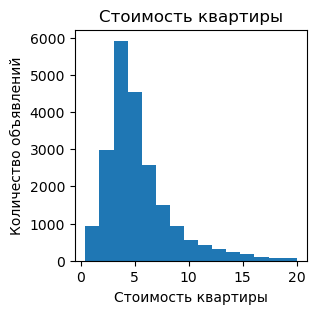

In [37]:
# общая стоимость квартиры
print(data['last_price'].describe())
data['last_price'].plot(bins = 15, kind ='hist',title = 'Cтоимость квартиры',figsize = (3,3))\
.set(xlabel = 'Стоимость квартиры',ylabel = 'Количество объявлений');

count    21291.000000
mean         0.093963
std          0.032670
min          0.007963
25%          0.074985
50%          0.093333
75%          0.111236
max          0.392354
Name: price_for_m2, dtype: float64


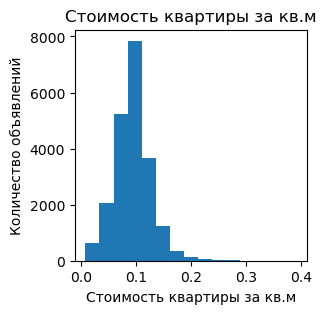

In [38]:
# цена квартиры за квадратный метр
print(data['price_for_m2'].describe())
data['price_for_m2'].plot(bins = 15, kind ='hist',title = 'Cтоимость квартиры за кв.м',figsize = (3,3))\
.set(xlabel = 'Cтоимость квартиры за кв.м',ylabel = 'Количество объявлений');

**Вывод:**
- большая часть предложений - это квартиры стоимостью до 6.4 млн руб., или 111 тыс. руб. за кв. метр.

**`Количество комнат`**

count    21291.000000
mean         2.019868
std          0.927898
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64


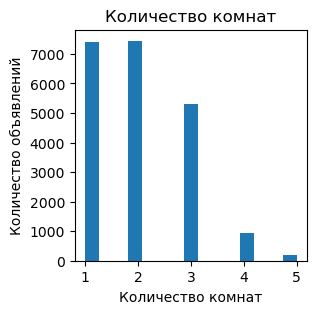

In [39]:

print(data['rooms'].describe())
data['rooms'].plot(bins = 15, kind ='hist',title = 'Количество комнат',figsize = (3,3))\
.set(xlabel = 'Количество комнат',ylabel = 'Количество объявлений');

**Вывод:**
- большая часть предложений - это квартиры до 3 комнат.

**`Высота потолков`**

count    13097.000000
mean         2.702368
std          0.241149
min          2.500000
25%          2.500000
50%          2.600000
75%          2.790000
max          4.000000
Name: ceiling_height, dtype: float64


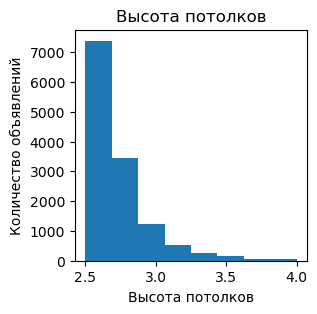

In [40]:
print(data['ceiling_height'].describe())
data['ceiling_height'].plot(bins = 8, kind ='hist',title = 'Высота потолков',figsize = (3,3))\
.set(xlabel = 'Высота потолков',ylabel = 'Количество объявлений');

**Вывод:**
- большая часть предложений - это квартиры c высотой потолков до 2,8 метров.

**`Этаж квартиры`**

count    21291.000000
mean         5.240806
std          3.847885
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         17.000000
Name: floor, dtype: float64


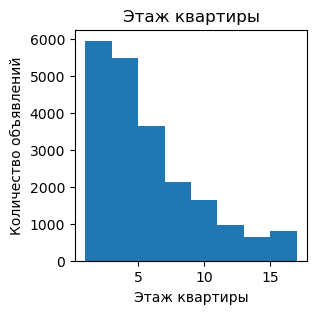

In [41]:
print(data['floor'].describe())
data['floor'].plot(bins = 8, kind ='hist',title = 'Этаж квартиры',figsize = (3,3))\
.set(xlabel = 'Этаж квартиры',ylabel = 'Количество объявлений');

**Вывод:**
- большая часть предложений - это квартиры, которые находятся с 1 по 7 этажах.

**`Тип этажа квартиры`**

count      21291
unique         3
top       другой
freq       15487
Name: floor_type, dtype: object


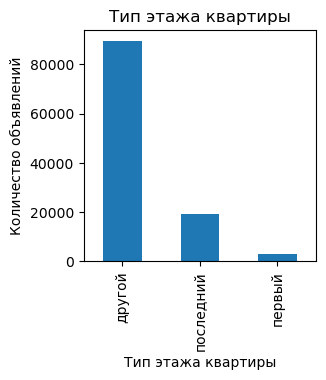

In [42]:
print(data['floor_type'].describe())
data.groupby('floor_type')['floor'].sum().sort_values(ascending=False).plot(kind='bar',title = 'Тип этажа квартиры',\
                                 figsize = (3,3)).set(xlabel = 'Тип этажа квартиры',ylabel = 'Количество объявлений');

**Вывод:**
- большая часть предложений - это квартиры, которые находятся ни на первом, ни на последнем этажах.

**`Общее количество этажей в доме`**

count    21291.000000
mean        10.044526
std          5.950279
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         25.000000
Name: floors_total, dtype: float64


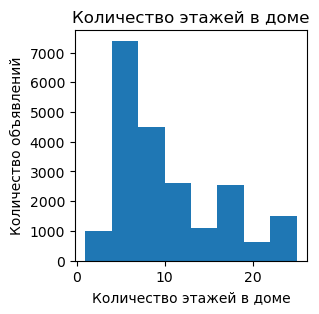

In [43]:
print(data['floors_total'].describe())
data['floors_total'].plot(bins = 8, kind ='hist',title = 'Количество этажей в доме',figsize = (3,3))\
.set(xlabel = 'Количество этажей в доме',ylabel = 'Количество объявлений');

**Вывод:**
- большая часть предложений - это квартиры в домах, где общее количество этажей - до 14.

**`Расстояние до центра города`**

count    16127.000000
mean        14.538869
std          8.750060
min          0.208000
25%          9.781500
50%         13.219000
75%         16.316000
max         65.968000
Name: cityCenters_nearest, dtype: float64


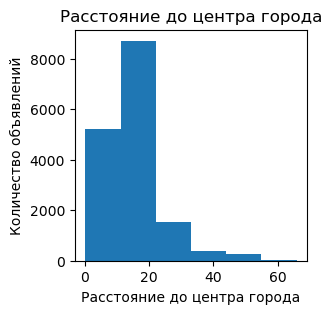

In [44]:
# переводим м в км
data['cityCenters_nearest'] = data['cityCenters_nearest']/1000
#анализируем
print(data['cityCenters_nearest'].describe()) 
data['cityCenters_nearest'].plot(bins = 6, kind ='hist',title = 'Расстояние до центра города',figsize = (3,3))\
.set(xlabel = 'Расстояние до центра города',ylabel = 'Количество объявлений');

**Вывод:**
- большая часть предложений - это квартиры, которые расположены в пределах 16 км. от центра города

**`Расстояние до ближайшего аэропорта`**

count    16110.000000
mean        28.711053
std         12.657642
min          0.000000
25%         18.357000
50%         26.773000
75%         37.276500
max         84.869000
Name: airports_nearest, dtype: float64


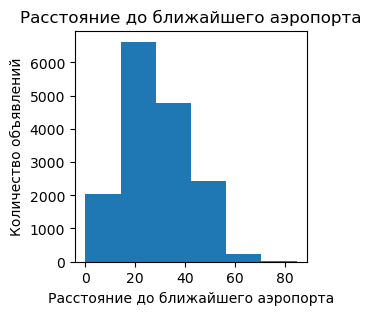

In [45]:
# переводим м в км
data['airports_nearest'] = data['airports_nearest']/1000
#анализируем
print(data['airports_nearest'].describe())
data['airports_nearest'].plot(bins = 6, kind ='hist',title = 'Расстояние до ближайшего аэропорта',figsize = (3,3))\
.set(xlabel = 'Расстояние до ближайшего аэропорта',ylabel = 'Количество объявлений');

**Вывод:**
- большая часть предложений - это квартиры, которые расположены в пределах 37 км до ближайшего аэропорта.

**`Расстояние до ближайшего парка`**

count    7151.000000
mean        0.491354
std         0.341404
min         0.001000
25%         0.288500
50%         0.455000
75%         0.612000
max         3.190000
Name: parks_nearest, dtype: float64


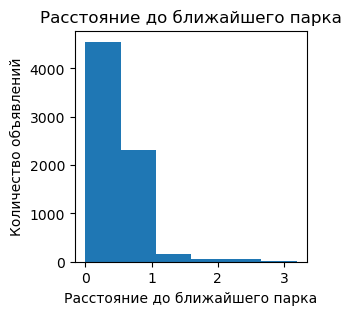

In [46]:
# переводим м в км
data['parks_nearest'] = data['parks_nearest']/1000
# анализируем
print(data['parks_nearest'].describe())
data['parks_nearest'].plot(bins = 6, kind ='hist',title = 'Расстояние до ближайшего парка',figsize = (3,3))\
.set(xlabel = 'Расстояние до ближайшего парка',ylabel = 'Количество объявлений');

**Вывод:**
- большая часть предложений - это квартиры, которые расположены в пределах 612 м. до ближайшего парка.

**`День и месяц публикации объявления`**

count    21291.000000
mean         2.565826
std          1.790121
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64


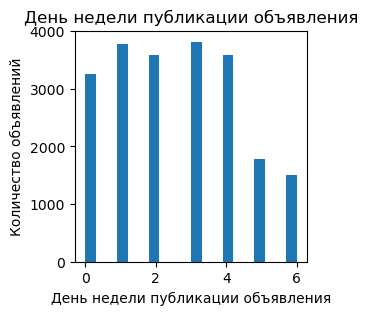

In [47]:
# день публикации
print(data['weekday'].describe())
data['weekday'].plot(bins = 20, kind ='hist',title = 'День недели публикации объявления',figsize = (3,3))\
.set(xlabel = 'День недели публикации объявления',ylabel = 'Количество объявлений');

count    21291.000000
mean         6.392654
std          3.490505
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64


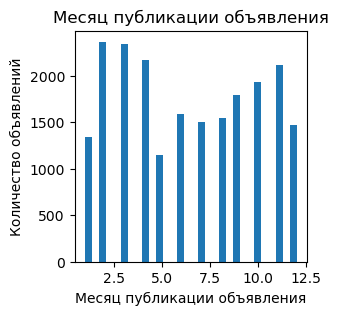

In [48]:
# месяц публикации
print(data['month'].describe())
data['month'].plot(bins = 30, kind ='hist',title = 'Месяц публикации объявления',figsize = (3,3))\
.set(xlabel = 'Месяц публикации объявления',ylabel = 'Количество объявлений');

**Вывод:**
- большая часть предложений публикуются в будни, а именно с понедельника по пятницу. 
- большая часть предложений публикуются с январь по октябрь. В мае публикуют меньше всего, больше всего публикуют в феврале и марте. 

**`Сколько дней было размещено объявление (от публикации до снятия)`**

count    18512.000000
mean       177.583513
std        215.473878
min          1.000000
25%         44.000000
50%         94.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64
94.0
177.58351339671563


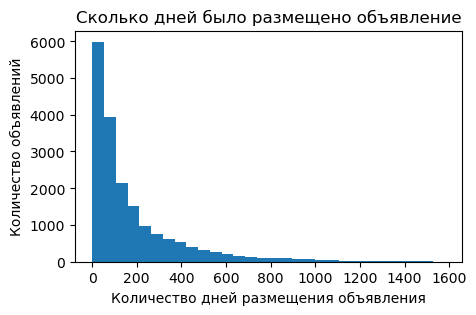

In [49]:
print(data['days_exposition'].describe()) 
data['days_exposition'].plot(bins = 30, kind ='hist',title = 'Сколько дней было размещено объявление',figsize = (5,3))\
.set(xlabel = 'Количество дней размещения объявления',ylabel = 'Количество объявлений');
print(data['days_exposition'].median())
print(data['days_exposition'].mean())

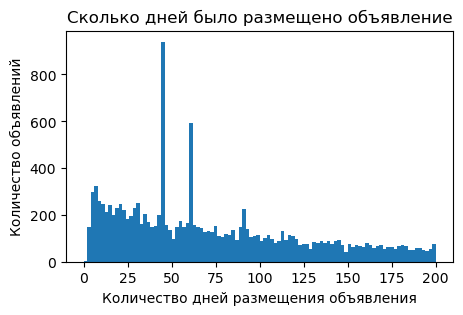

In [50]:
data['days_exposition'].plot(bins = 100, kind ='hist', figsize=(5, 3), range=(0,200),\
        title = 'Сколько дней было размещено объявление')\
.set(xlabel = 'Количество дней размещения объявления',ylabel = 'Количество объявлений');

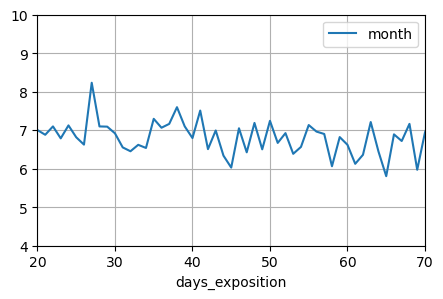

In [51]:
days_exposition_month = data.pivot_table(index = 'days_exposition',values = 'month').plot(grid=True,figsize = (5,3))\
.set(xlim = (20,70), ylim = (4,10))

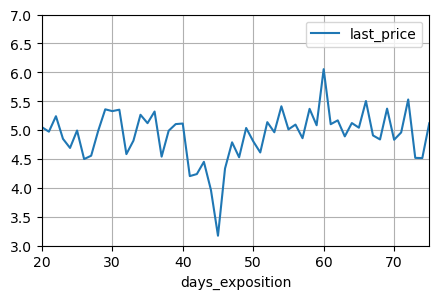

In [52]:
days_exposition_price = data.pivot_table(index = 'days_exposition',values = 'last_price').plot(grid=True,figsize = (5,3))\
.set(xlim = (20,75), ylim = (3,7))

**Вывод:**
- большая часть квартир продавалось за период до 238 дней (т.е. примерно за 8 месяцев)
- в среднем квартиры продавались за 103 дня (т.е. примерно за 3 месяца)
- быстрые продажи - до 44 дней, долгие продажи - от 238 до 529 дней (от 8 до 18 месяцев), аномально долгие продажи - это продажи в срок от 529 дней (выше усов), т.е. примерно от 18 месяцев (т.е. от 1,5 лет). 
- имеются всплески продаж на 30, 45 и 60 дни, т.е. через каждые 15 дней. Возможно это связано с тем, что люди с помощью опций Яндекс Недвижимости перемещают объявления вверх поиска или с уменьшением цены, тем самым ускоряя процесс продажи квартиры (что видно на графике - на 45 день цена резко падает, в другие дни скорее всего была задействована опция по продвижению объявления по продаже квартиры)

**`Какие факторы больше всего влияют на общую (полную) стоимость объекта?`**

**Цена и общая площадь**

In [53]:
round(data['total_area'].corr(data['last_price']),2)

0.76

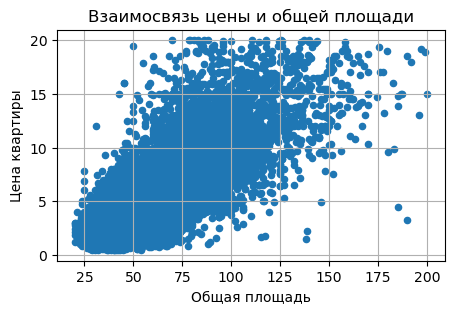

In [54]:
korr_total_area = data.plot('total_area', 'last_price', grid = True, kind = 'scatter',\
                            title = 'Взаимосвязь цены и общей площади',figsize = (5,3))\
                            .set(xlabel = 'Общая площадь',ylabel = 'Цена квартиры')

**Вывод**:
- По большей части цена и общая площадь имеют положительную корреляцию, т.е. имеют прямую зависимость. Таким образом с ростом площади квартиры растет ее цена.

**Цена и жилая площадь**

In [55]:
round(data['living_area'].corr(data['last_price']),2)

0.65

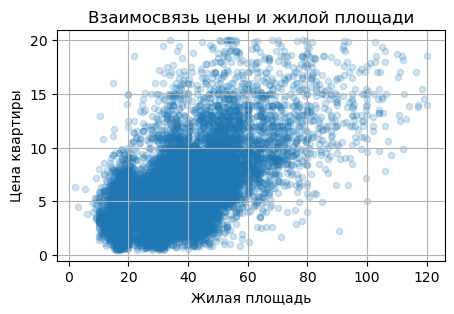

In [56]:
korr_living_area = data.plot('living_area','last_price',grid = True, kind = 'scatter',alpha = 0.2, \
                             title = 'Взаимосвязь цены и жилой площади',figsize = (5,3))\
                             .set(xlabel = 'Жилая площадь',ylabel = 'Цена квартиры')

**Вывод**:
- По большей части цена и жилая площадь имеют положительную корреляцию, хоть и менее выраженную, чем цена и общая площадь. Таким образом с ростом жилой площади квартиры растет ее цена. 

**Цена и площадь кухни**

In [57]:
round(data['kitchen_area'].corr(data['last_price']),2)

0.56

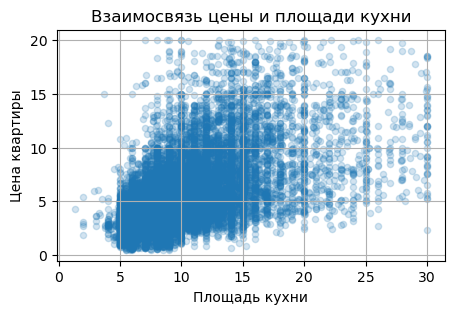

In [58]:
korr_kitchen_area = data.plot('kitchen_area','last_price',grid=True, kind = 'scatter', alpha = 0.2,\
                              figsize = (5,3),title = 'Взаимосвязь цены и площади кухни')\
                              .set(xlabel = 'Площадь кухни',ylabel = 'Цена квартиры')

**Вывод**:
- По большей части цена и площадь кухни имеют положительную корреляцию, хоть и менее выраженную, чем цена и жилая площадь. Таким образом с ростом площади площади квартиры растет ее цена. 

**Цена и количество комнат**

In [59]:
print(data['rooms'].corr(data['last_price']))

0.47946146985248367


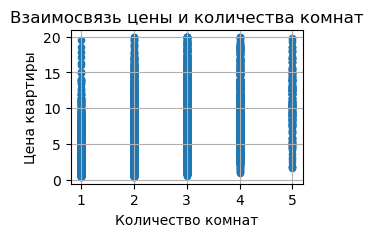

In [60]:
korr_rooms = data.plot('rooms','last_price',grid=True,kind = 'scatter',\
                       title = 'Взаимосвязь цены и количества комнат',figsize = (3,2))\
                       .set(xlabel = 'Количество комнат',ylabel = 'Цена квартиры');

**Вывод**:
- Цена и количество комнат имеют меньшую положительную корреляцию, чем площадь квартиры. Таким образом количество комнат меньше влияют на цену квартиры, чем площадь квартиры.

**Цена и тип этажа, на котором расположена квартира**

In [61]:
round(data['floor'].corr(data['last_price']),2)

0.11

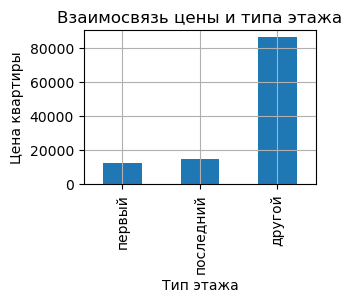

In [62]:
korr_floor_type = data.groupby('floor_type')['last_price'].sum().sort_values().plot(grid=True,kind = 'bar',\
                title = 'Взаимосвязь цены и типа этажа',figsize = (3,2)).set(xlabel = 'Тип этажа',ylabel = 'Цена квартиры');

**Вывод**:
- Связи между ценой и этажом - почти нет. Однако, как правило выставляют предложения квартир, которые расположены ни на первом, ни на последнем этажах. 

**Цена и дата размещения**

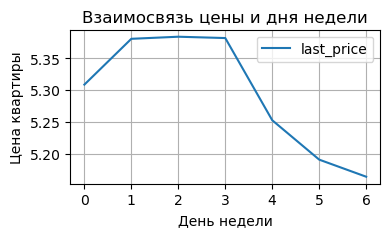

In [63]:
korr_weelday = data.pivot_table(index = 'weekday',values = 'last_price').plot(grid=True, \
              title = 'Взаимосвязь цены и дня недели',figsize = (4,2)).set(xlabel = 'День недели',ylabel = 'Цена квартиры');

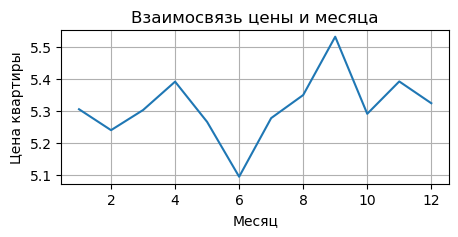

In [64]:
korr_month = data.pivot_table(index = 'month',values = 'last_price').plot(grid=True, title = 'Взаимосвязь цены и месяца', \
                                    legend = False,figsize = (5,2)).set(xlabel = 'Месяц',ylabel = 'Цена квартиры');

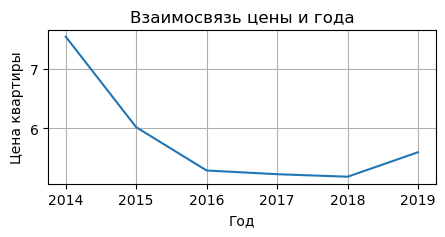

In [65]:
korr_month = data.pivot_table(index = 'year',values = 'last_price').plot(grid=True, title = 'Взаимосвязь цены и года', \
                                        legend = False,figsize = (5,2)).set(xlabel = 'Год',ylabel = 'Цена квартиры');

**Вывод**:
- Связи между датой и ценой - нет. 
- С 2014 по 2018 цена на квартиру падала, с 2018 цена начала повышаться.
- В июне и по субботам чаще всего цена за квартиру ниже. 

**Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [68]:
# топ-10 населенных пунктов по средней цене одного квадратного метра

locality_pivot = (
    data
    .groupby('locality_name')['price_for_m2']
    .agg({'count', 'mean'})
    .sort_values(by = 'count', ascending = False)
    .head(10)
    
).sort_values(by = 'mean', ascending = False)

locality_pivot

,count,mean
locality_name,,
Санкт-Петербург,13945,0.108060
Пушкин,349,0.101822
поселок Кудрово,246,0.092941
поселок Мурино,412,0.084645
Петергоф,197,0.084502
поселок Шушары,392,0.078459
Колпино,334,0.075390
Гатчина,306,0.068676
Всеволожск,388,0.067119


**Вывод**
- цена за метр выше всего в г.Санкт-Петербурге.
- цена за метр ниже всего в г.Выборге.

**Зависимость стоимости объектов от расстояния до центра города**

,price_for_m2
cityCenters_nearest_km,
27.0,0.132116
1.0,0.127544
6.0,0.127145
5.0,0.126162
2.0,0.124298
7.0,0.123270
4.0,0.121464
8.0,0.119669
3.0,0.113898


<Axes: title={'center': 'Удаленность от центра'}, xlabel='cityCenters_nearest_km'>

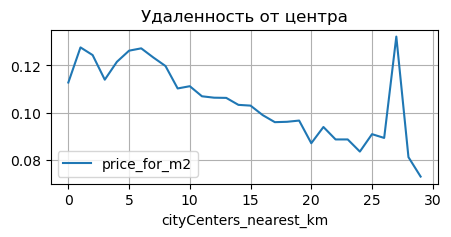

In [71]:
pivot_sb = (
    data
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index = 'cityCenters_nearest_km', values = 'price_for_m2')
);
pivot_plot_sb = (
    data
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index = 'cityCenters_nearest_km', values = 'price_for_m2')
    .plot(grid=True,title = 'Удаленность от центра',figsize = (5,2))
);            
display(pivot_sb.sort_values(by = 'price_for_m2',ascending = False).head(10));
display(pivot_plot_sb);

In [72]:
round(data['cityCenters_nearest_km'].corr(data['price_for_m2']),2)

-0.4

**Вывод**
- Прямая связь между близостью к центру Санкт-Петербурга и ценой - почти нет (есть небольшой тренд в строну уменьшения стоимости при увеличения расстояния от центра). Например, квартира в центре Санкт-Петербурга может стоить дешевле квартиры в 6 км от центра города, квартира в 3 км от центра может стоить почти столько же, сколько и квартира в 10 км от центра.

### Общий вывод

**Вывод по проведенному анализу**
- стоимость квартиры зависит в большей степени от общей площади квартиры (прямая зависимость) и в меньшей степени от количества комнат (прямая зависимость) и от расстояния от центра города (обратная зависимость)
- стоимость квартиры не зависит от даты размещения объявления и этажа
- самые дорогие квартиры - в г. Санкт-Петербурге
- самые дешевые квартиры - в г. Выборге
- в среднем квартиру по объявлению продают за 3 месяца, но есть случаи, когда на продажу уходит больше 1,5 лет
- в среднем аэропорты расположены не близко - в 27 км от квартиры, однако в среднем близко с квартирами находятся парки (примерно 612 метров от квартиры)
- больше всего новых предложений можно увидеть с января по октября в буднии дни
- в среднем квартиры расположены на расстоянии 13 км. от центра города
- в среднем предлагают квартиры в 9 этажных домах, на 4 этаже, с 2 комнатами, с высотой потолка - 2,6 метра, с площадью квартиры - 51 квадратных метра, небольшой кухней (9 квадратных метров) и стоимость 4,5 млн руб.

_В ходе анализа получены данные, которые кажутся корректными (сопостовимы с реальностью)._
